In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sps
%matplotlib inline

In [2]:
df = pd.read_csv('911.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326425 entries, 0 to 326424
Data columns (total 9 columns):
lat          326425 non-null float64
lng          326425 non-null float64
desc         326425 non-null object
zip          286835 non-null float64
title        326425 non-null object
timeStamp    326425 non-null object
twp          326310 non-null object
addr         326425 non-null object
e            326425 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 22.4+ MB


In [4]:
df['zip'].value_counts().head(5)

19401.0    22136
19464.0    21588
19403.0    16488
19446.0    15793
19406.0    10800
Name: zip, dtype: int64

In [5]:
df['twp'].value_counts().head(5)

LOWER MERION    28073
ABINGTON        20206
NORRISTOWN      18433
UPPER MERION    17276
CHELTENHAM      15026
Name: twp, dtype: int64

In [6]:
df['title'].nunique()

133

In [7]:
df['reason'] = df['title'].apply(lambda title:title.split(":")[0])

In [8]:
df['reason']

0             EMS
1             EMS
2            Fire
3             EMS
4             EMS
5             EMS
6             EMS
7             EMS
8             EMS
9         Traffic
10        Traffic
11        Traffic
12        Traffic
13        Traffic
14        Traffic
15        Traffic
16            EMS
17            EMS
18            EMS
19        Traffic
20        Traffic
21        Traffic
22           Fire
23        Traffic
24        Traffic
25            EMS
26            EMS
27           Fire
28        Traffic
29        Traffic
           ...   
326395       Fire
326396        EMS
326397        EMS
326398    Traffic
326399    Traffic
326400    Traffic
326401    Traffic
326402        EMS
326403       Fire
326404    Traffic
326405       Fire
326406       Fire
326407    Traffic
326408    Traffic
326409    Traffic
326410    Traffic
326411    Traffic
326412        EMS
326413       Fire
326414    Traffic
326415    Traffic
326416    Traffic
326417        EMS
326418       Fire
326419    

In [9]:
df['reason'].value_counts().head(5)

EMS        161441
Traffic    116065
Fire        48919
Name: reason, dtype: int64

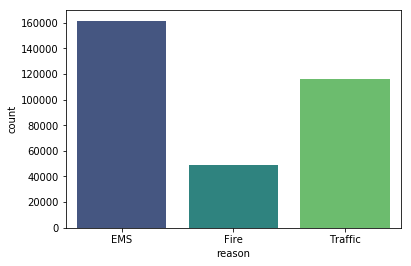

In [10]:
sps.countplot(x = 'reason',data = df,palette='viridis')

In [11]:
type(df['timeStamp'].iloc()[0])

str

In [12]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [13]:
type(df['timeStamp'].iloc()[0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
time = df['timeStamp'].iloc[0]
time.hour

17

In [15]:
time.month

12

In [16]:
df['Hour'] = df['timeStamp'].apply(lambda time:time.hour)
df['Month'] = df['timeStamp'].apply(lambda time:time.month)
df['Year'] = df['timeStamp'].apply(lambda time:time.year)
df['Day of week'] = df['timeStamp'].apply(lambda time:time.dayofweek)

In [17]:
df['Day of week']

0         3
1         3
2         3
3         3
4         3
5         3
6         3
7         3
8         3
9         3
10        3
11        3
12        3
13        3
14        3
15        3
16        3
17        3
18        3
19        3
20        3
21        3
22        3
23        3
24        3
25        3
26        3
27        3
28        3
29        3
         ..
326395    5
326396    5
326397    5
326398    5
326399    5
326400    5
326401    5
326402    5
326403    5
326404    5
326405    5
326406    5
326407    5
326408    5
326409    5
326410    5
326411    5
326412    5
326413    5
326414    5
326415    5
326416    5
326417    5
326418    5
326419    5
326420    5
326421    5
326422    5
326423    5
326424    5
Name: Day of week, Length: 326425, dtype: int64

In [18]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'thu',4:'Fri',5:'Sat',6:'sun'}

In [19]:
df['Day of week'] = df['Day of week'].map(dmap)

In [20]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Year,Day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,2015,thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,2015,thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,2015,thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,2015,thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,2015,thu


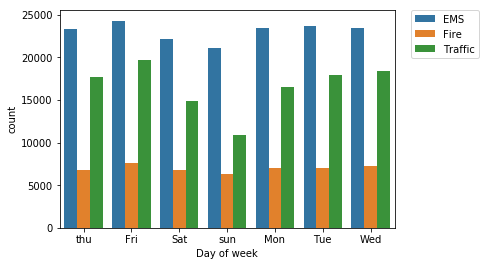

In [21]:
sps.countplot(x='Day of week',data=df,hue='reason')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

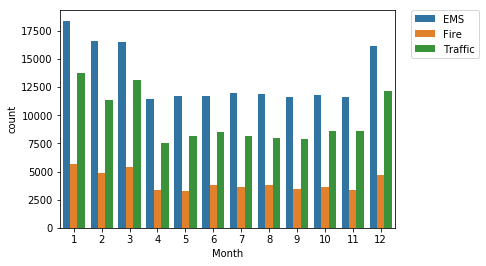

In [22]:
sps.countplot(x='Month',data=df,hue='reason')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

In [24]:
bymonth = df.groupby('Month').count()

In [26]:
bymonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Year,Day of week
Month,,,,,,,,,,,,,
1,37824,37824,37824,33480,37824,37824,37812,37824,37824,37824,37824,37824,37824
2,32828,32828,32828,28963,32828,32828,32817,32828,32828,32828,32828,32828,32828
3,34987,34987,34987,31070,34987,34987,34973,34987,34987,34987,34987,34987,34987
4,22343,22343,22343,19671,22343,22343,22336,22343,22343,22343,22343,22343,22343
5,23093,23093,23093,20254,23093,23093,23082,23093,23093,23093,23093,23093,23093


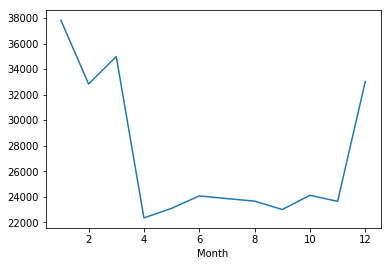

In [28]:
bymonth['lat'].plot()

No handles with labels found to put in legend.


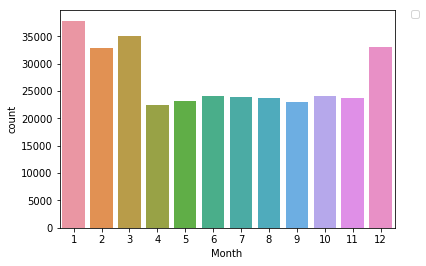

In [29]:
sps.countplot(x='Month',data=df)
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

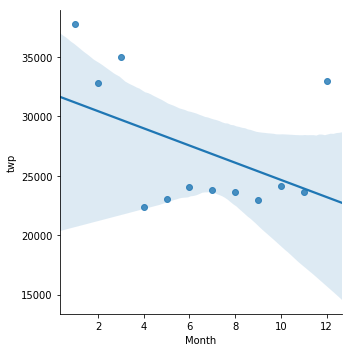

In [32]:
sps.lmplot(x='Month',y='twp',data=bymonth.reset_index())

In [33]:
t = df['timeStamp'].iloc[0]

In [34]:
df['data'] = df['timeStamp'].apply(lambda t:t.date())

In [36]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,Hour,Month,Year,Day of week,data
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,2015,thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,2015,thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,Fire,14,12,2015,thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,16,12,2015,thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,16,12,2015,thu,2015-12-10


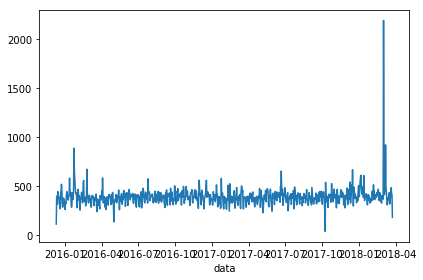

In [42]:
df.groupby('data').count()['lat'].plot()
plt.tight_layout()

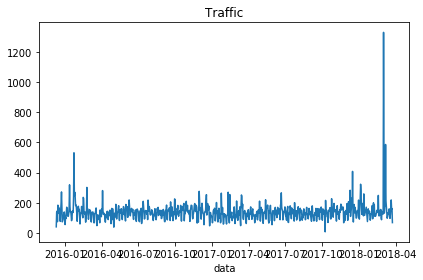

In [46]:
df[df['reason']=='Traffic'].groupby('data').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

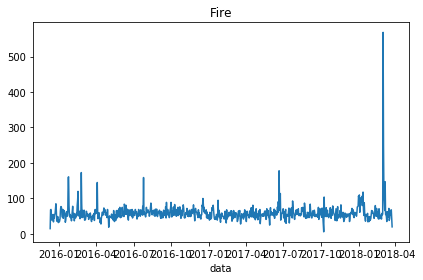

In [49]:
df[df['reason']=='Fire'].groupby('data').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

In [56]:
dayhour = df.groupby(by =['Day of week','Hour']).count()['twp'].unstack()

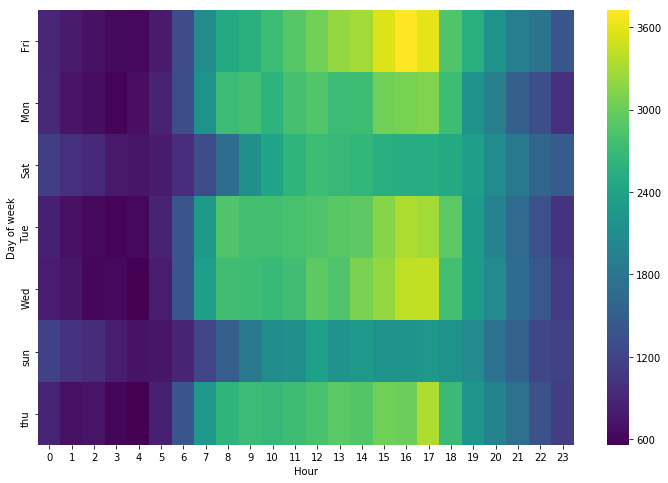

In [61]:
plt.figure(figsize=(12,8))
sps.heatmap(dayhour,cmap='viridis')

<Figure size 864x576 with 0 Axes>

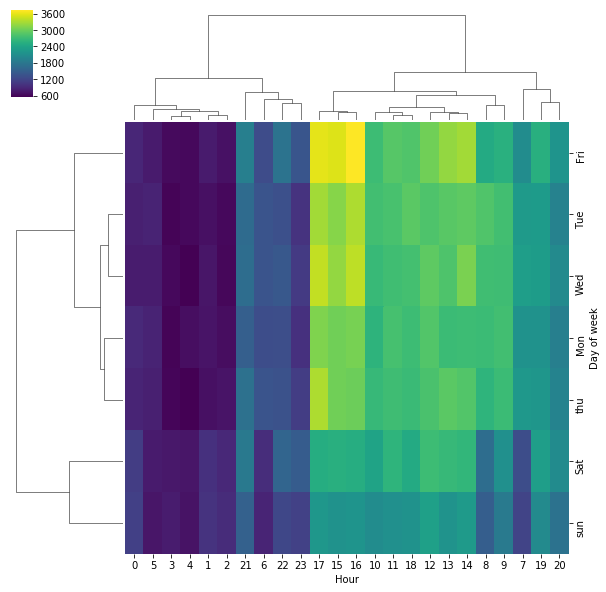

In [62]:
plt.figure(figsize=(12,8))
sps.clustermap(dayhour,cmap='viridis')

In [63]:
dayhour = df.groupby(by =['Day of week','Month']).count()['twp'].unstack()
dayhour.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of week,,,,,,,,,,,,
Fri,5530,4846,6999,3574,3276,3747,3736,3296,4222,3431,3377,5568
Mon,5716,5213,4311,3086,3537,3264,3687,3324,3031,4249,3260,4284
Sat,5099,4428,4353,3488,2763,3024,3515,2809,3143,3042,2970,5199
Tue,6115,4753,4751,3065,3989,3373,3211,4044,3141,3689,3891,4689
Wed,5487,5066,5692,3002,3651,3877,3195,4014,3191,3337,4065,4473


<Figure size 864x576 with 0 Axes>

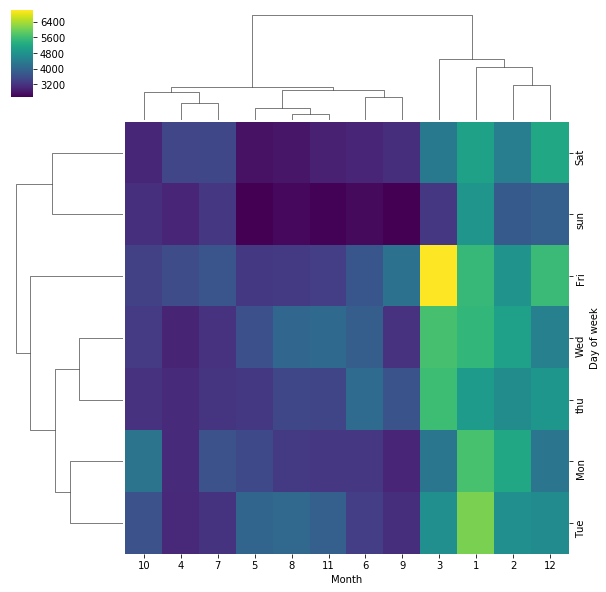

In [64]:
plt.figure(figsize=(12,8))
sps.clustermap(dayhour,cmap='viridis')

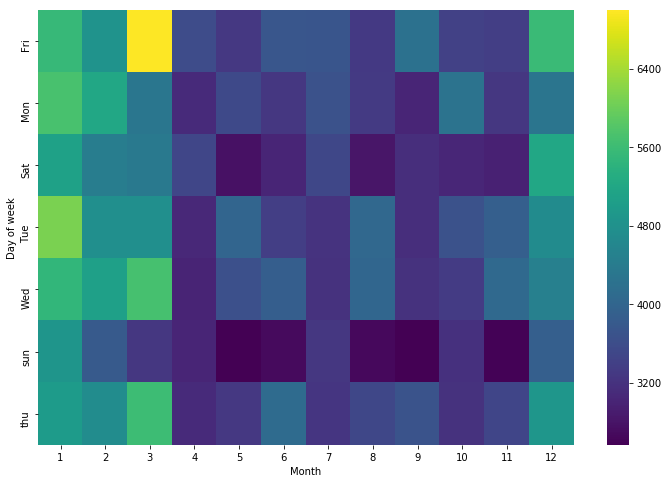

In [65]:
plt.figure(figsize=(12,8))
sps.heatmap(dayhour,cmap='viridis')